####### 🚀 At the heart of every solution is a model that assumes linearity: THis means that the expected value of the target can be expressed as a weighted sum of features, or conditional mean E[Y | X= x] can be expressed as a weighted sum of the features x 

In [13]:
import math
import time
import numpy as np
import tensorflow as tf
import os
import sys
import pandas as pd

In [14]:
sys.path.append('../')  # Add parent directory

from d2l import tensorflow as d2l

print("d2l imported successfully!")

d2l imported successfully!


##### 🚀 Linear regression is an affine transformation of input features, which is characterized by linear transformation of features via a weighted sum, combined with a translation via the added bias.

##### 
Note that large differences between estimates 
 and targets 
 lead to even larger contributions to the loss, due to its quadratic form (this quadraticity can be a double-edge sword; while it encourages the model to avoid large errors it can also lead to excessive sensitivity to anomalous data). To measure the quality of a model on the entire dataset of 
 examples, we simply average (or equivalently, sum) the losses on the training set

####
First, we can subsume the bias 
b into the parameter w 
 by appending a column to the design matrix consisting of all 1s. Then our prediction problem is to minimize ||y - Xw||**2 .As long as the design matrix has full rank (no feature is linearly dependent on the others), then there will be just one critical point on the loss surface and it corresponds to the minimum of the loss over the entire domain

####
Unfortunately, SGD has drawbacks, both computational and statistical. One problem arises from the fact that processors are a lot faster multiplying and adding numbers than they are at moving data from main memory to processor cache. It is up to an order of magnitude more efficient to perform a matrix–vector multiplication than a corresponding number of vector–vector operations. This means that it can take a lot longer to process one sample at a time compared to a full batch

In [15]:
## vectorization for speed
n= 10000
a = tf.ones(n)
b = tf.ones(n)

In [20]:
c = tf.Variable(tf.zeros(n))
t= time.time()
for i in range(n):
    c[i].assign(a[i] + b[i])

print(f"time taken {time.time() - t:.9f} seconds")

time taken 3.538556814 seconds


In [19]:
t= time.time()
d= a + b
print(f"time taken {time.time() - t:.9f} seconds")

time taken 0.001000643 seconds


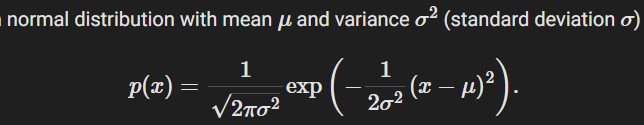